# Módulo 1 - Introduction to Statistics

### Medidas de Posição

- Moda: Valor mais frequente em um conjunto de dados;
- Mediana: Posição mais central de um conjunto de dados;
- Média: Soma das observações dividida pelo número de observações.

 Para calcular a **moda** de uma variável precisamos apenas da frequência dessa variável, já a **mediana** é necessário ordenar as realizações. A **média** só pode ser calculada para variáveis quantitativas.
 
Logo, para variáveis nominais só conseguimos trabalhar com a moda. Já as ordinais, conseguimos trabalhar com a moda e a mediana.

 In January 1986, the space shuttle Challenger broke apart shortly after liftoff. The accident was caused by a part that was not designed to fly at the unusually cold temperature of 29◦ F at launch.

In [1]:
#Launch-temperatures of the first 25 shuttle missions
launch_temperatures = [66,70,69,80,68,67,72,70,70,57,63,70,78,67,53,67,75,70,81,76,79,75,76,58,29]

In [2]:
import statistics
launch_temperatures_mean = statistics.mean(launch_temperatures)
launch_temperatures_mode = statistics.median(launch_temperatures)
launch_temperatures_median = statistics.mode(launch_temperatures)
print(f"Média {launch_temperatures_mean}, moda {launch_temperatures_mode} e mediana {launch_temperatures_median}")



Média 68.24, moda 70 e mediana 70


### Medidas de Dispersão

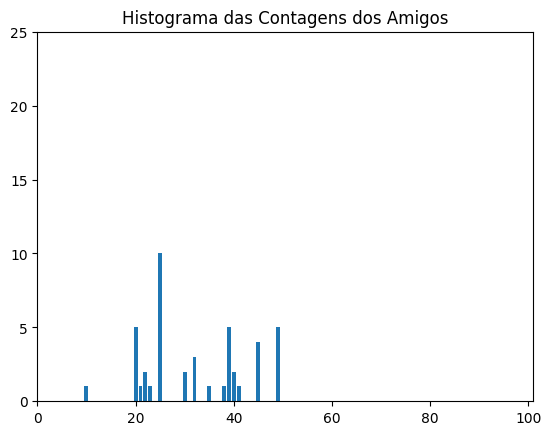

In [62]:
from collections import Counter
import matplotlib.pyplot as plt

num_friends = [20, 20, 40, 50, 50, 49,41,45,45,45,45,10,39,39,100,100,25,25,25,32,32,50,25,25,49,30,25,32,39,35,25,25,25,39,49,40,20,50,100,49,49,39,38,30,25,23,22,22,21,20,20]

friend_counts = Counter(num_friends)
xs = range(50)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 25])
plt.title("Histograma das Contagens dos Amigos")
plt.show()

In [55]:
#Vamos gerar alguma métricas para melhor analisar
num_points = len (num_friends)
maior_valor = max(num_friends)
menor_valor = min(num_friends)

print(f"Tamanho da amostra: {num_points} \nMaior Valor: {maior_valor} \nMenor Valor: {menor_valor}")

Tamanho da amostra: 51 
Maior Valor: 100 
Menor Valor: 10


In [56]:
valores_ordenados = sorted(num_friends)
segundo_menor = valores_ordenados[1]
segundo_maior =  valores_ordenados[-2]
print(f"Segundo menor valor: {segundo_menor} \nSegundo maior valor: {segundo_maior}")

Segundo menor valor: 20 
Segundo maior valor: 100


Uma única medida de posição pode não fornecer informações suficientes sobre a variabilidade de um conjunto de observações. O exemplo abaixo ilustra essa situação:

In [3]:
notas ={  
    'x':[3, 4, 5, 6, 7],
    'y':[1, 3, 5, 7, 9],
    'z':[5, 5, 5, 5, 5],
    'w':[3, 5, 5, 7,None],
    'v':[3, 5, 5, 6, 6]
}

In [4]:
import pandas as pd
df_notas = pd.DataFrame(notas)
df_notas.head()

,x,y,z,w,v
0,3,1,5,3.0,3
1,4,3,5,5.0,5
2,5,5,5,5.0,5
3,6,7,5,7.0,6
4,7,9,5,NaN,6


In [5]:
df_notas.mean()

x    5.0
y    5.0
z    5.0
w    5.0
v    5.0
dtype: float64

Ao analisar os conjuntos de dados x, y, z, w e v, podemos observar que a a média é igual a 5 em todos os casos, isso não fornece informações sobre suas diferentes variabilidades. É importante considerar medidas que resumam a variabilidade de um conjunto de observações, permitindo-nos comparar conjuntos de valores diferentes de acordo com critérios estabelecidos. Duas medidas amplamente utilizadas para esse propósito são o desvio médio e a variância.

In [6]:
desvio_medio = df_notas['x'] - df_notas['x'].mean()
print(desvio_medio)


0   -2.0
1   -1.0
2    0.0
3    1.0
4    2.0
Name: x, dtype: float64


No exemplo dado para o grupo A, os desvios em relação à média são -2, -1, 0, 1, 2. É importante notar que a soma desses desvios é sempre igual a zero para qualquer conjunto de dados. Isso ocorre porque os valores acima da média são compensados pelos valores abaixo da média, resultando em um cancelamento e uma soma total igual a zero.

Porém, apenas a soma dos desvios não é uma medida adequada de dispersão, pois acaba se anulando. Nesse caso, não conseguimos ter uma noção clara da variabilidade dos dados.

In [7]:
df_notas.std()

x    1.581139
y    3.162278
z    0.000000
w    1.632993
v    1.224745
dtype: float64

Portanto, podemos concluir que, com base nos desvios padrão, as colunas 'y', 'w' e 'v' possuem uma maior dispersão em relação à média, enquanto as colunas 'x' e 'z' têm uma dispersão menor ou nula (todos os valores são iguais).

### Quantis Empíricos 

A média e o desvio padrão podem não ser adequados para representar um conjunto de dados, uma vez que:
- São afetados por valores extremos;
- Com apenas esse dois valores não conseguimos ter ideia da simetria ou assimetria do conjunto de dados.

Os quantis são medidas que nos permitem dividir os dados em partes iguais com base em uma proporção específica. Por exemplo, se falamos do quantil de ordem 0.5 (ou 50%), isso significa que metade dos dados está abaixo desse valor e metade está acima.

Podemos usar quantis para dividir os dados em diferentes proporções. Por exemplo, o quantil de ordem 0.25 (ou 25%) nos dá um valor tal que 25% dos dados estão abaixo dele e 75% estão acima. Da mesma forma, o quantil de ordem 0.75 (ou 75%) nos dá um valor em que 75% dos dados estão abaixo e 25% estão acima.

Em resumo, os quantis nos ajudam a entender como os dados estão distribuídos e como eles se comparam em relação a diferentes proporções. Eles nos permitem identificar valores que se encontram em diferentes partes da distribuição.

In [8]:
lista1 = [15, 5, 3, 8, 10, 2, 7, 11, 12]
lista1.sort()
print(lista1)

[2, 3, 5, 7, 8, 10, 11, 12, 15]


In [9]:
import numpy as np
q1 = np.percentile(lista1,25)
q2 = np.percentile(lista1,50)
q3 = np.percentile(lista1,75)

print(f"Primeiro quartil:{q1} \nSegundo quartil {q2} \nTeceiro Quartil: {q3}")

Primeiro quartil:5.0 
Segundo quartil 8.0 
Teceiro Quartil: 11.0


In [10]:
media_lista1 = round(np.mean(lista1),2)
print(media_lista1)

8.11


Podemos observar que a média é muito próxima a mediana.

In [11]:
#Nesse exemplo vamos acrescentar o valor 67 no conjunto de dados
lista2 = [15, 5, 3, 8, 10, 2, 7, 11, 12,67]
lista2.sort()
print(lista2)

[2, 3, 5, 7, 8, 10, 11, 12, 15, 67]


In [12]:
mediana_lista2 = np.percentile(lista2,50)
media_lista2 = round(np.mean(lista2),2)
print(f"Mediana:{mediana_lista2} \nMedia:{media_lista2}")

Mediana:9.0 
Media:14.0


A mediana está relativamente próxima à mediana dos valores originais, porém distante da média dos valores atuais. Com isso, podemos observar claramente que a mediana não é muito afetada pelo valor discrepante que foi adicionado, **67**.

In [13]:
lista2_q1 = np.percentile(lista2,25)
lista2_q3 = np.percentile(lista2,75)
print(f"Primeiro Quartil:{lista2_q1} \nTerceiro Quartil:{lista2_q3}")

Primeiro Quartil:5.5 
Terceiro Quartil:11.75


Uma boa medida de dispersão é o intervalo interquaril, ou seja:

    dq = q3 - q1

In [15]:
d1 = lista2_q3 - lista2_q1
d1

6.25

Uma distribuição simétrica ou aproximadamente simétrica é aquela em que os dados estão igualmente distribuídos em relação à sua mediana (q2). Nesse caso, as distâncias entre os quartis (q1, q2, q3) são iguais ou aproximadamente iguais.

Sabendo que X(n) é representa o valor máximo de uma distribuição e X(1) um valor de mínimo, para ter ums distribuição simétrica, devemos ter:
- q2 - x(1) ~= x(n) - q2 
- q2 - q1   ~= q3 - q2;
- q1 - x(1) ~= x(n) - q3;
- distâncias entre mediana e q1, q3 menores do que distâncias entre os extremos e q1, q3.

 q2 - x(1) é chamada dispersão inferior e x(n) - q2 é a dispersão superior.


Com base nas medidas de quartis (q1, q3) e no intervalo interquartil (dq), podemos calcular os limites superior e inferior para identificar possíveis outliers. Esses limites são calculados da seguinte forma:

- Limite Superior (LS) = q3 + (1,5 * dq)
- Limite Inferior (LI) = q1 - (1,5 * dq)

Esses limites definem uma faixa em torno dos quartis que é usada para identificar valores que estão significativamente acima (no caso do LS) ou abaixo (no caso do LI) da distribuição geral dos dados.

Os valores que estão acima do limite superior ou abaixo do limite inferior são considerados pontos exteriores, também conhecidos como outliers. Esses pontos podem ser indicativos de valores atípicos ou discrepantes em relação ao restante dos dados e podem requerer uma análise mais aprofundada para determinar se são resultados corretos ou erros.

### Correlação

In [61]:
#Variância
from typing import List
from statistics import mean

def variance(xs: List[float]) -> float:
    x_bar = mean(xs)
    deviations = [x - x_bar for x in xs]
    squared_deviations = [x**2 for x in deviations]
    return sum(squared_deviations) / len(xs)

In [63]:
variance(num_friends)

358.59131103421765

Queremos analisar a relação entre duas métricas. Para isso primeiro analisamos a covariância que mede a variação simultânea de duas variáveis em relação as suas médias.

In [66]:
def covariance(xs: np.ndarray, ys: np.ndarray) -> float:
    assert len(xs) == len(ys), "Os arrays devem ter o mesmo comprimento"
    return np.cov(xs, ys)[0, 1]


Uma covariância positiva alta indica que x tende a ser alta quando y é alto e baixo quando y for baixo. Já uma covariância alta positiva tende que x tende a ser alta quando y é baixo e que x tende a ser baixo quando y é alto.

Assim como a variância a covariância é uma métrica dificil de ser analisada devido ao fato da unidade ser o produto das unidades de entrada. Por isso é mais comum calcular a correlação, que divide os desvios-padrão das duas variáveis.

In [67]:
def correlation(xs: np.ndarray, ys: np.ndarray) -> float:
    assert len(xs) == len(ys), "Os arrays devem ter o mesmo comprimento"
    return np.corrcoef(xs, ys)[0, 1]